In [8]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron

from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.compose import ColumnTransformer




In [9]:
x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(columns=['id'])
x_train = x_train.drop(columns=['id'])
x_test = x_test.drop(x_test.columns[0], axis=1)
x_train = x_train.drop(x_train.columns[0], axis=1)
x_train = x_train.dropna()
x_test = x_test.dropna()

In [10]:

x_test,y_test = x_test.drop(['satisfaction'],axis=1),x_test['satisfaction']
y_test = y_test.replace('neutral or dissatisfied',0)
y_test = y_test.replace('satisfied',1)
print(y_test.value_counts())
x_train,y_train = x_train.drop(['satisfaction'],axis=1),x_train['satisfaction']
y_train = y_train.replace('neutral or dissatisfied',0)
y_train = y_train.replace('satisfied',1)

satisfaction
0    14528
1    11365
Name: count, dtype: int64


C:\Users\LENOVE\AppData\Local\Temp\ipykernel_25696\198963968.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace('satisfied',1)
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_25696\198963968.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace('satisfied',1)


In [11]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
print(categorical_cols)
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

scaler = StandardScaler()
scaler.fit(x_train_encoded)
x_train_encoded_scaler = scaler.transform(x_train_encoded)
x_test_encoded_scaler = scaler.transform(x_test_encoded)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


In [ ]:

perceptron = Perceptron(random_state=42)

param_grid = {
    'penalty': ['l2', 'l1','elasticnet'],  
    'alpha': [0.0001, 0.001, 0.01,0.1,1],   
    'eta0': [0.1, 1.0],               
    'early_stopping': [True]          
}

grid_search = GridSearchCV(
    perceptron,
    param_grid,
    cv=5,
    scoring='accuracy',
)

grid_search.fit(x_train_encoded_scaler, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_encoded_scaler)

print("Best Parameters:", grid_search.best_params_)
print("\nTest Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

Best Parameters: {'alpha': 0.001, 'early_stopping': True, 'eta0': 1.0, 'max_iter': 2000, 'penalty': 'l1'}

Test Accuracy: 73.91%


In [19]:
model_perceptron = Perceptron(alpha=0.0001, early_stopping=True, penalty='elasticnet',
           random_state=42)

model_perceptron.fit(x_train_encoded_scaler, y_train)

y_train_pred = model_perceptron.predict(x_train_encoded_scaler)
y_test_pred = model_perceptron.predict(x_test_encoded_scaler)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")



Training Accuracy: 84.31%
Test Accuracy: 84.16%


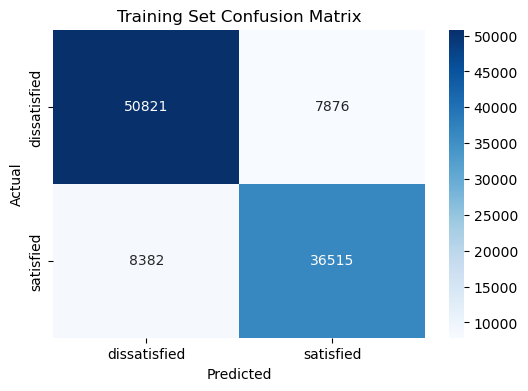

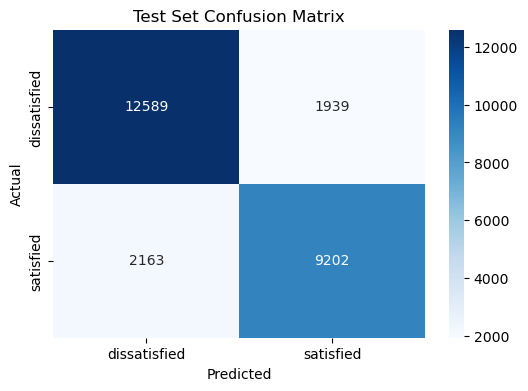


Classification Report (Test Set):
              precision    recall  f1-score   support

dissatisfied       0.85      0.87      0.86     14528
   satisfied       0.83      0.81      0.82     11365

    accuracy                           0.84     25893
   macro avg       0.84      0.84      0.84     25893
weighted avg       0.84      0.84      0.84     25893



In [21]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['dissatisfied', 'satisfied'],
                yticklabels=['dissatisfied', 'satisfied'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_train, y_train_pred, "Training Set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,target_names=['dissatisfied', 'satisfied']))

In [15]:

print("Training set distribution:\n", y_train.value_counts())
print( Counter(y_train_pred))
print("\nTest set distribution:\n", y_test.value_counts())
print( Counter(y_test_pred))


Training set distribution:
 satisfaction
0    58697
1    44897
Name: count, dtype: int64
Counter({np.int64(0): 59203, np.int64(1): 44391})

Test set distribution:
 satisfaction
0    14528
1    11365
Name: count, dtype: int64
Counter({np.int64(0): 14752, np.int64(1): 11141})
